In [1]:
# import correct packages

import pandas as pd
import json
import time
import statistics

In [2]:
# read the json file

df = pd.read_json('data.json',lines=True)

In [3]:
# initialize dictionaries that will track year and price

bedroom1_bathroom1 = {}
bedroom1_bathroom15 = {}
bedroom2_bathroom1 = {}
bedroom2_bathroom15 = {}
bedroom2_bathroom2 = {}
bedroom2_bathroom25 = {}
bedroom3_bathroom2 = {}
bedroom3_bathroom25 = {}
bedroom4 = {}
bedroom5 = {}

c = 0

In [4]:
# helper function that will be used to update dictionaries with rent prices 

def update_bedroom_dict(num_bed, curr_zip, update_dict):
    if num_bed == 1:
        if bathroom == 1.0:
            bedroom1_bathroom1[curr_zip] = update_dict
        if bathroom == 1.5:
            bedroom1_bathroom15[curr_zip] = update_dict
    if num_bed == 2:
        if bathroom == 1:
            bedroom2_bathroom1[curr_zip] = update_dict
        if bathroom == 1.0:
            bedroom2_bathroom1[curr_zip] = update_dict
        if bathroom == 1.5:
            bedroom2_bathroom15[curr_zip] = update_dict
        if bathroom == 2:
            bedroom2_bathroom2[curr_zip] = update_dict
        if bathroom == 2.0:
            bedroom2_bathroom2[curr_zip] = update_dict
        if bathroom == 2.5:
            bedroom2_bathroom25[curr_zip] = update_dict
    if num_bed == 3:
        if bathroom == 2:
            bedroom3_bathroom2[curr_zip] = update_dict
        if bathroom == 2.0:
            bedroom3_bathroom2[curr_zip] = update_dict
        if bathroom == 2.5:
            bedroom3_bathroom25[curr_zip] = update_dict
    if num_bed == 4:
        bedroom4[zpid] = new_dict
    if num_bed == 5:
        bedroom5[zpid] = new_dict

In [5]:
# iterate the data to populate the dictionaries for each bedroom and bathroom type
for zpid in df['zpid'].tolist():
    homeValue = df.loc[df['zpid'] == zpid]['data'][c]['HomeValueChartData']
    
    try:
        bedroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bedrooms']['$']
        bathroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bathrooms']['$']
    except (TypeError,KeyError):
        c=c+1
        continue
    c = c + 1

    chart = json.loads(homeValue)
    y= {2010:[], 2011:[], 2012:[], 2013:[], 2014:[], 2015:[], 2016:[], 2017:[]}

    # append rent so that it can be averaged later
    # the key is the year from [-4:]
    for i in chart['points']:
        year = int(time.ctime(i['x']/1000)[-4:])
        y[year].append(i['y'])
  
    # new_dict will have key: year,  value: average rent price
    new_dict ={}
    for key, value in y.items():
        if (len(value) != 0):
            new_dict[key] = statistics.mean(value)
            
    update_bedroom_dict(bedroom, zpid, new_dict)

In [6]:
# Note that the logic here is repeated for the other bedroom options below

print("Average rent: 1 bedroom 1 bathrooms\n")

# need to create a new dict that will be the one printed for result
# so that we don't modify the dictionary that we are iterating over 

rent_dict_1 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom1_bathroom1.items():
    for year, rent in value.items():
        rent_dict_1[year].append(rent)
        
# update the dictionary with same key but with value of averages     

for key, value in rent_dict_1.items():
    rent_dict_1[key] = statistics.mean(value)
    
    
print(rent_dict_1)
        
print("\nAverage rent: 1 bedroom 1.5 bathrooms\n")

rent_dict_15 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom1_bathroom15.items():
    for year, rent in value.items():
        rent_dict_15[year].append(rent)
        
        
for key, value in rent_dict_15.items():
    rent_dict_15[key] = statistics.mean(value)
    
    
print(rent_dict_15)


Average rent: 1 bedroom 1 bathrooms

{2010: 1602.5821078431372, 2011: 1459.3792892156862, 2012: 1485.254153050109, 2013: 1529.7781862745098, 2014: 1614.2878540305012, 2015: 1715.2486383442265, 2016: 1856.859477124183, 2017: 1915.3445261437907}

Average rent: 1 bedroom 1.5 bathrooms

{2010: 1913.2966666666666, 2011: 1784.92, 2012: 1806.8555555555556, 2013: 1826.6966666666667, 2014: 1973.3622222222223, 2015: 2072.8933333333334, 2016: 2234.0266666666666, 2017: 2279.7533333333336}


In [7]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 2 bedroom 1 bathrooms\n")

rent_dict_21 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom1.items():
    for year, rent in value.items():
        rent_dict_21[year].append(rent)
        
        
for key, value in rent_dict_21.items():
    rent_dict_21[key] = statistics.mean(value)
    
    
print(rent_dict_21)

print("\nAverage rent: 2 bedroom 1.5 bathrooms\n")

rent_dict_2 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom15.items():
    for year, rent in value.items():
        rent_dict_2[year].append(rent)
        
        
for key, value in rent_dict_2.items():
    rent_dict_2[key] = statistics.mean(value)
    
    
print(rent_dict_2)

print("\nAverage rent: 2 bedroom 2 bathrooms\n")

rent_dict_22 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom2.items():
    for year, rent in value.items():
        rent_dict_22[year].append(rent)
        
        
for key, value in rent_dict_22.items():
    rent_dict_22[key] = statistics.mean(value)
    
    
print(rent_dict_22)

print("\nAverage rent: 2 bedroom 2.5 bathrooms\n")

rent_dict_25 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom25.items():
    for year, rent in value.items():
        rent_dict_25[year].append(rent)
        
        
for key, value in rent_dict_25.items():
    rent_dict_25[key] = statistics.mean(value)
    
    
print(rent_dict_25)

Average rent: 2 bedroom 1 bathrooms

{2010: 1874.2815824468084, 2011: 1748.9835992907801, 2012: 1783.9268617021276, 2013: 1830.3303413120568, 2014: 1916.893395390071, 2015: 2033.5085328014184, 2016: 2203.934840425532, 2017: 2244.13594858156}

Average rent: 2 bedroom 1.5 bathrooms

{2010: 1862.148148148148, 2011: 1748.8002645502645, 2012: 1772.3829365079366, 2013: 1834.402557319224, 2014: 1958.5870811287477, 2015: 2079.5376984126983, 2016: 2265.5773809523807, 2017: 2275.117724867725}

Average rent: 2 bedroom 2 bathrooms

{2010: 2486.368752581578, 2011: 2411.971189591078, 2012: 2403.559307448713, 2013: 2436.6067740603057, 2014: 2525.238055899766, 2015: 2754.8317155445407, 2016: 3017.9807930607185, 2017: 3035.82832163018}

Average rent: 2 bedroom 2.5 bathrooms

{2010: 2471.8686659772493, 2011: 2441.309376077215, 2012: 2439.8522923129954, 2013: 2463.272233712513, 2014: 2560.823767666322, 2015: 2764.201999310583, 2016: 2997.874698379869, 2017: 3013.891761461565}


In [8]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 3 bedroom 2 bathrooms\n")

rent_dict_3 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom3_bathroom2.items():
    for year, rent in value.items():
        rent_dict_3[year].append(rent)
        
        
for key, value in rent_dict_3.items():
    rent_dict_3[key] = statistics.mean(value)
    
    
print(rent_dict_3)

print("\nAverage rent: 3 bedroom 2.5 bathrooms\n")

rent_dict_35 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom3_bathroom25.items():
    for year, rent in value.items():
        rent_dict_35[year].append(rent)
        
        
for key, value in rent_dict_35.items():
    rent_dict_35[key] = statistics.mean(value)
    
    
print(rent_dict_35)

Average rent: 3 bedroom 2 bathrooms

{2010: 3065.0253658536585, 2011: 3017.8716666666664, 2012: 3060.8613414634146, 2013: 3108.3878455284553, 2014: 3261.297357723577, 2015: 3577.366544715447, 2016: 3911.6779268292685, 2017: 3931.981707317073}

Average rent: 3 bedroom 2.5 bathrooms

{2010: 2882.768194070081, 2011: 2900.142632524708, 2012: 2912.651673405211, 2013: 2949.5921495956873, 2014: 3040.0537398921833, 2015: 3306.705188679245, 2016: 3531.3641060197665, 2017: 3540.7237646001795}


In [9]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 4 bedroom\n")

rent_dict_4 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom4.items():
    for year, rent in value.items():
        rent_dict_4[year].append(rent)
        
        
for key, value in rent_dict_4.items():
    rent_dict_4[key] = statistics.mean(value)
    
    
print(rent_dict_4)

print("\nAverage rent: 5 bedroom\n")

rent_dict_5 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom5.items():
    for year, rent in value.items():
        rent_dict_5[year].append(rent)
        
        
for key, value in rent_dict_5.items():
    rent_dict_5[key] = statistics.mean(value)
    
    
print(rent_dict_5)

Average rent: 4 bedroom

{2010: 5497.665365507452, 2011: 5490.27321386326, 2012: 5487.2232375207, 2013: 5691.393452803407, 2014: 5868.164833215046, 2015: 6489.642565649397, 2016: 6873.528624695617, 2017: 6769.838565340909}

Average rent: 5 bedroom

{2010: 8103.489161849711, 2011: 8091.694765574824, 2012: 7997.637202954399, 2013: 8306.388005780347, 2014: 8487.456165703275, 2015: 9349.516538214515, 2016: 9697.88688182402, 2017: 9638.8856775851}


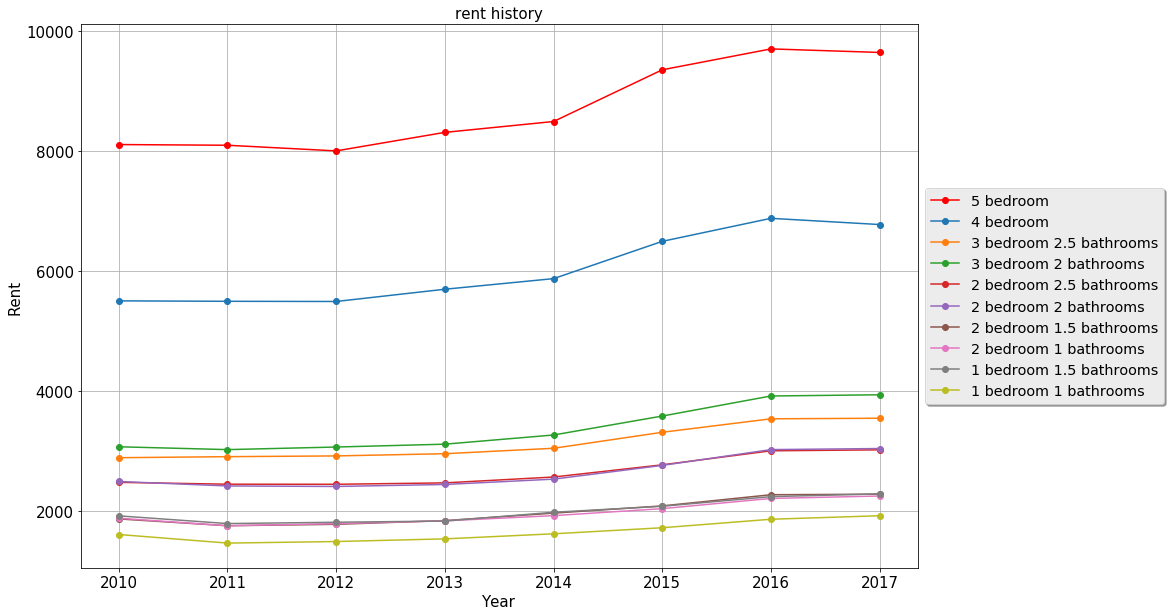

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(list(rent_dict_5.keys()), list(rent_dict_5.values()), 'ro-', label='5 bedroom')
ax.plot(list(rent_dict_4.keys()),list(rent_dict_4.values()), 'o-', label='4 bedroom')
ax.plot(list(rent_dict_35.keys()),list(rent_dict_35.values()), 'o-', label='3 bedroom 2.5 bathrooms')
ax.plot(list(rent_dict_3.keys()),list(rent_dict_3.values()), 'o-', label='3 bedroom 2 bathrooms')
ax.plot(list(rent_dict_25.keys()),list(rent_dict_25.values()), 'o-', label='2 bedroom 2.5 bathrooms')
ax.plot(list(rent_dict_22.keys()),list(rent_dict_22.values()), 'o-', label='2 bedroom 2 bathrooms')
ax.plot(list(rent_dict_2.keys()),list(rent_dict_2.values()), 'o-', label='2 bedroom 1.5 bathrooms')
ax.plot(list(rent_dict_21.keys()),list(rent_dict_21.values()), 'o-', label='2 bedroom 1 bathrooms')
ax.plot(list(rent_dict_15.keys()),list(rent_dict_15.values()), 'o-', label='1 bedroom 1.5 bathrooms')
ax.plot(list(rent_dict_1.keys()),list(rent_dict_1.values()), 'o-', label='1 bedroom 1 bathrooms')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
plt.title('rent history')
plt.xlabel('Year')
plt.ylabel('Rent')
plt.grid(True)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)